# Processing the IR dataset

In [1]:
from spectrochempy.api import *
import os


        SpectroChemPy's API
        Version   : 0.1a3.post2
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


We read the .scp saved previously

In [2]:
samples = {'P350':{'label':'$\mathrm{M_P}\,(623\,K)$'},
           'A350':{'label':'$\mathrm{M_A}\,(623\,K)$'}, 
           'B350':{'label':'$\mathrm{M_B}\,(623\,K)$'}}

for key in samples.keys():
    # our data are in our test `scpdata` directory. 
    basename = os.path.join(scpdata,'agirdata/{}/FTIR/FTIR'.format(key))
    filename = basename + '.scp'
    samples[key]['IR'] = NDDataset.read( filename)

We will resize the data in the interesting region of wavenumbers

In [3]:
for key in samples.keys():
    
    s = samples[key]['IR'] 
    
    # reduce to a useful windoww of wavenumbers
    W = (1290., 3990.)  
    sw = s[:,W[0]:W[1]]
    
    samples[key]['IR'] = sw # the slicing was not done inplace, let's store this change

[SpectroChemPy 2017-11-12 06:13:08] changed default loglevel to 10


<IPython.core.display.Javascript object>


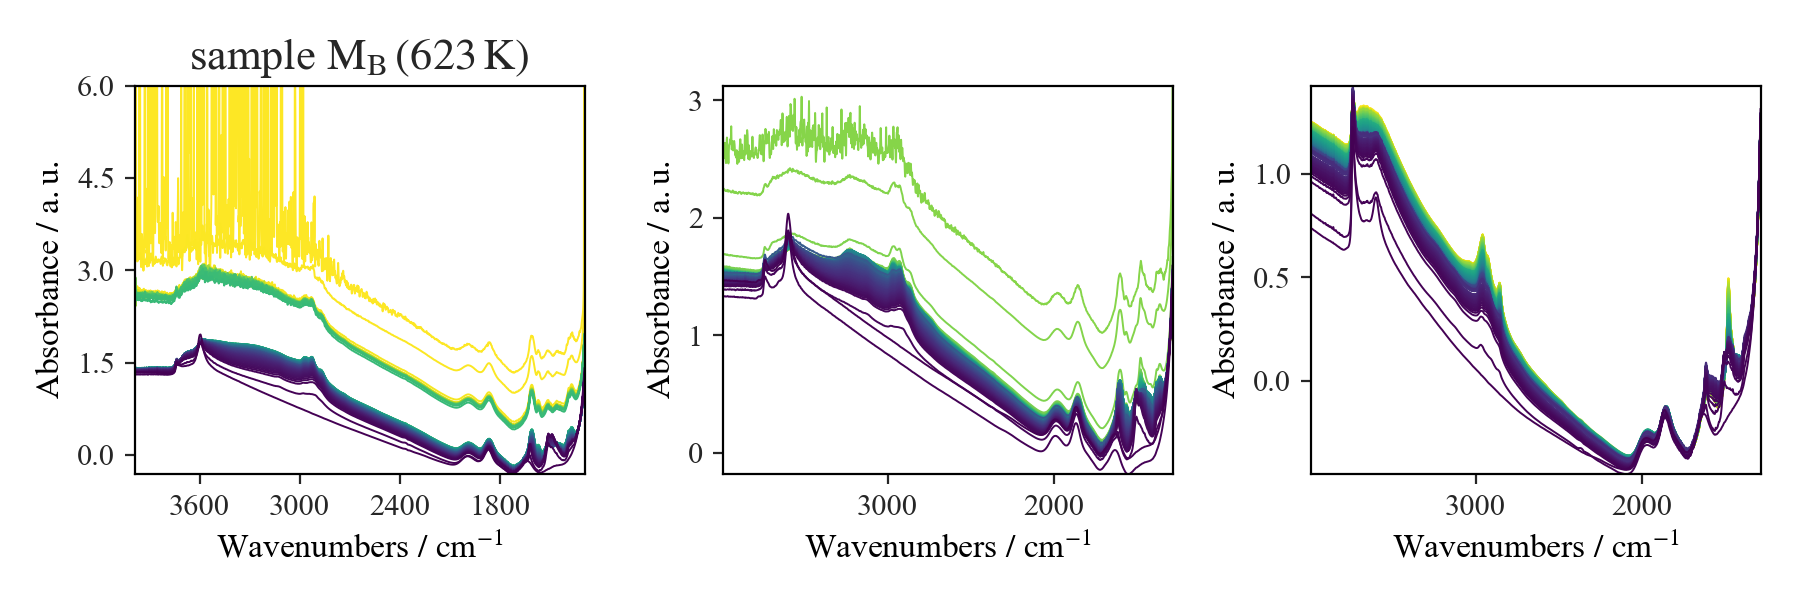

[SpectroChemPy 2017-11-12 06:13:08] update plot
[SpectroChemPy 2017-11-12 06:13:08] update plot
[SpectroChemPy 2017-11-12 06:13:09] update plot


In [4]:
options.log_level=DEBUG

figure(figsize=(9,3)) 
axes = subplots(nrow=1, ncol=3)

for key in samples.keys():
    s = samples[key]['IR']
    s.axes = axes # store the axes information in each dataset

i=1
for key in samples.keys():
    s = samples[key]['IR']
    s.plot_stack(ax=i, colorbar=False)
    i += 1
    label = samples[key]['label']
    title = 'sample {}'.format(label)
    s.ax.set_title(title, fontsize=16)